##**STEP 1 : PERKENALAN**

**MILESTONES 2**

**MATERI : Computer Vision (Image Classifications)**

**BATCH : 6**

**BY : Rebran Natanael Lumbanraja**

**Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :**

* Mampu memahami konsep Computer Vision/NLP.
* Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
* Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
* Mampu menganalisis dan menjelaskan layer yang dibuat.

## **STEP 2 : IMPORTING LIBRARY**

In [1]:
import numpy as np
import PIL
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.pipeline import Pipeline, make_pipeline

# evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

%matplotlib inline

**Library yang akan digunakan, masing-masing memiliki fungsi sebagai berikut:**

* Pandas adalah sebuah library yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.

* Numpy berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, pangkat, dan operasi lainnya yang bisa diterapkan pada vektor atau matriks.

* Matplotlib adalah modul python untuk menggambar plot 2D dengan kualitas tinggi. matplotlib dapat digunakan dalam script python, interpreter python dan ipython, server, dan 6 GUI toolkit.

* Tensorflow adalah Python library open source untuk komputasi numerik yang dapat mempercepat dan memudahkan dalam menggunakan machine learning.

* Scikit-learn atau sklearn adalah modul untuk bahasa pemograman python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## **STEP 3 : DATA LOADING**

In [3]:
# Set output agar valuenya tetap
np.random.seed(77)
tf.random.set_seed(77)

In [4]:
#Read dataset
train_folder=r'/content/drive/MyDrive/Sport/train'
val_folder=r'/content/drive/MyDrive/Sport/valid'
test_folder=r'/content/drive/MyDrive/Sport/test'

## **STEP 4 : DATA EXPLORATION**

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Sport/class_dict.csv')

In [6]:
data.head(10)

class_index            class  height  width  scale by
0            0       air hockey     150    150         1
1            1  ampute football     150    150         1
2            2          archery     150    150         1
3            3    arm wrestling     150    150         1
4            4     axe throwing     150    150         1
5            5     balance beam     150    150         1
6            6    barell racing     150    150         1
7            7         baseball     150    150         1
8            8       basketball     150    150         1
9            9   baton twirling     150    150         1

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_index  100 non-null    int64 
 1   class        100 non-null    object
 2   height       100 non-null    int64 
 3   width        100 non-null    int64 
 4   scale by     100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [8]:
data.shape

(100, 5)

In [9]:
data['class'].unique()

array(['air hockey', 'ampute football', 'archery', 'arm wrestling',
       'axe throwing', 'balance beam', 'barell racing', 'baseball',
       'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx',
       'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping',
       'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket',
       'croquet', 'curling', 'disc golf', 'fencing', 'field hockey',
       'figure skating men', 'figure skating pairs',
       'figure skating women', 'fly fishing', 'football',
       'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf',
       'hammer throw', 'hang gliding', 'harness racing', 'high jump',
       'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching',
       'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting',
       'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse',
       'log rolling', 'luge', 'motorcycle racing', 'mushing',
       'nascar racing', 'olympic wrestling', 'parallel bar',
 

In [10]:
data['class'].value_counts()

air hockey              1
pole vault              1
shot put                1
sailboat racing         1
rugby                   1
                       ..
fly fishing             1
figure skating women    1
figure skating pairs    1
figure skating men      1
wingsuit flying         1
Name: class, Length: 100, dtype: int64

### **About This Dataset**

**Source :** https://www.kaggle.com/gpiosenka/sports-classification

**Content :**
Collection of sports images covering 100 different sports.. Images are 224,224,3 jpg format. Data is separated into train, test and valid directories. Additionallly a csv file is included for those that wish to use it to create there own train, test and validation datasets.

**Inspiration :**
Wanted to build a high quality clean data set that was easy to use and had no bad images or duplication between the train, test and validation data sets. Provides a good data set to test your models on. Design for straight forward application of keras preprocessing functions like ImageDataenerator.flowfromdirectory or if you use the csv file ImageDataGenerator.flowfromdataframe. This dataset was carefully created so that the region of interest (ROI) in this case the sport occupies approximately 50% of the pixels in the image. As a consequence even models of moderate complexity should achieve training and validation accuracies in the high 90's.

In [11]:
import pathlib
data_dir = pathlib.Path(train_folder)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

13572


**Terdapat 13.572 total gambar untuk data training pada folder train_folder.**

In [12]:
datval = pathlib.Path(val_folder)
image_count1 = len(list(datval.glob('*/*.jpg')))
print(image_count1)

500


**Terdapat 500 total gambar untuk data validasi pada folder val_folder.**

In [13]:
dattest = pathlib.Path(test_folder)
image_count2 = len(list(dattest.glob('*/*.jpg')))
print(image_count2)

500


**Terdapat 500 total gambar untuk data test pada folder test_folder.**

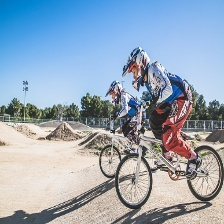

In [14]:
bmx = list(data_dir.glob('bmx/*'))
PIL.Image.open(str(bmx[0]))

**Melihat gambar ke-0 di folder bmx pada data training**

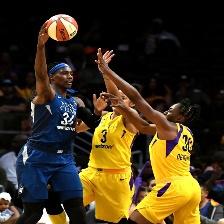

In [15]:
basketball = list(data_dir.glob('basketball/*'))
PIL.Image.open(str(basketball[0]))

**Melihat gambar ke-0 di folder basketball pada data training**

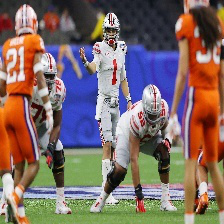

In [16]:
football = list(data_dir.glob('football/*'))
PIL.Image.open(str(football[0]))

**Melihat gambar ke-0 di folder football pada data training**

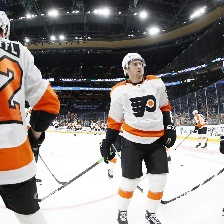

In [17]:
hockey = list(data_dir.glob('hockey/*'))
PIL.Image.open(str(hockey[0]))

**Melihat gambar ke-0 di folder hockey pada data training**

## **STEP 5 : DATA PREPROCESSING**

In [18]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
batch_size = 5

**Disini saya menset-up default ukuran gambar 224 x 224, karena pada context dataset dijelaskan "All images were then resized to 224 X224 X 3 and converted to jpg format."**

In [19]:
train_dataset = image_dataset_from_directory(
    train_folder,
    shuffle = True,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 13572 files belonging to 100 classes.


In [20]:
val_dataset = image_dataset_from_directory(
    val_folder,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 500 files belonging to 100 classes.


In [21]:
test_dataset = image_dataset_from_directory(
    test_folder,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 500 files belonging to 100 classes.


In [22]:
class_names = train_dataset.class_names
print(class_names)

['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing', 'roller 

### **Using autotune to prevent bottleneck on training**

In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## **STEP 6 : DEFINE MODEL**

In [24]:
num_classes = 100

# Base Model
model = Sequential([
    # standardized data
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

### **Train base model**

In [27]:
epochs=10

history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/10
2715/2715 [==============================] - 54s 13ms/step - loss: 4.0541 - accuracy: 0.0908 - val_loss: 3.2712 - val_accuracy: 0.2140
Epoch 2/10
2715/2715 [==============================] - 18s 7ms/step - loss: 2.6547 - accuracy: 0.3434 - val_loss: 2.8541 - val_accuracy: 0.2660
Epoch 3/10
2715/2715 [==============================] - 17s 6ms/step - loss: 1.2868 - accuracy: 0.6594 - val_loss: 3.6971 - val_accuracy: 0.2940
Epoch 4/10
2715/2715 [==============================] - 16s 6ms/step - loss: 0.4589 - accuracy: 0.8753 - val_loss: 5.4085 - val_accuracy: 0.2700
Epoch 5/10
2715/2715 [==============================] - 16s 6ms/step - loss: 0.2570 - accuracy: 0.9315 - val_loss: 6.7985 - val_accuracy: 0.2580
Epoch 6/10
2715/2715 [==============================] - 16s 6ms/step - loss: 0.1748 - accuracy: 0.9539 - val_loss: 7.4099 - val_accuracy: 0.2460
Epoch 7/10
2715/2715 [==============================] - 16s 6ms/step - loss: 0.1528 - accuracy: 0.9601 - val_loss: 8.3543 - val_a

### **Visualize base model training results**

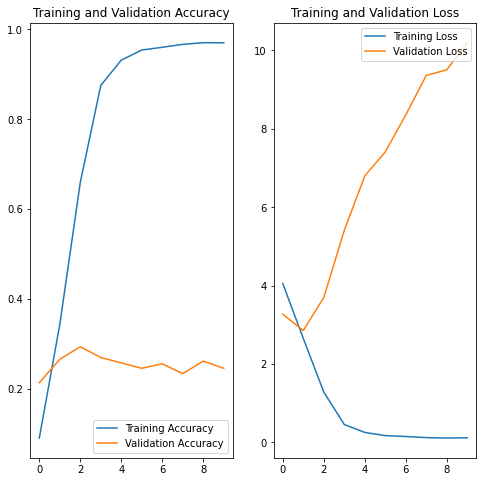

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Dari hasil plot diatas menunjukkan bahwa model overfitting.**

### **Model Improving with Data Augmentation and Dropout**

In [29]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Dengan data augmentation, jumlah data training dapat ditambah dengan cara menambahkan data tambahan hasil dari "random transformation" sample data training. Kali ini, gambar-gambar yang ada di data training akan di flip, rotasi dan zoom.**

In [30]:
num_classes = 100

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # This means dropping out 20% of the output units randomly from the applied layer.
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

**Selain menambahkan data augmentation, disini juga ditambahkan dropout untuk mengurangi overfitting.**

In [31]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

### **Train model**

In [33]:
epochs = 20
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/20
2715/2715 [==============================] - 22s 8ms/step - loss: 4.1787 - accuracy: 0.0565 - val_loss: 3.6910 - val_accuracy: 0.1360
Epoch 2/20
2715/2715 [==============================] - 21s 8ms/step - loss: 3.3879 - accuracy: 0.1747 - val_loss: 3.1181 - val_accuracy: 0.2240
Epoch 3/20
2715/2715 [==============================] - 21s 8ms/step - loss: 2.9696 - accuracy: 0.2521 - val_loss: 3.1717 - val_accuracy: 0.2460
Epoch 4/20
2715/2715 [==============================] - 20s 8ms/step - loss: 2.7371 - accuracy: 0.3003 - val_loss: 2.5324 - val_accuracy: 0.3360
Epoch 5/20
2715/2715 [==============================] - 21s 8ms/step - loss: 2.5739 - accuracy: 0.3395 - val_loss: 2.5820 - val_accuracy: 0.3660
Epoch 6/20
2715/2715 [==============================] - 21s 8ms/step - loss: 2.4503 - accuracy: 0.3612 - val_loss: 2.2714 - val_accuracy: 0.4200
Epoch 7/20
2715/2715 [==============================] - 21s 8ms/step - loss: 2.3585 - accuracy: 0.3845 - val_loss: 2.1943 - val_ac

### **Visualize training results**

**Membuat plot dari loss dan accuracy pada training dan validation sets.**

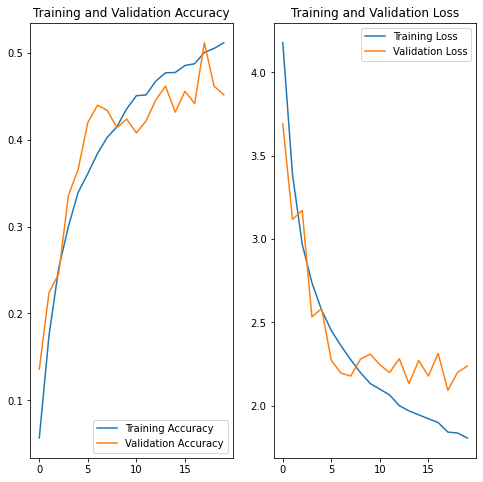

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Setelah diterapkan data augmentation dan dropout, hasil training data tidak overfit lagi. Namun skor Accuracy yang didapat cukup rendah walau sudah di epoch 2x lipat dari sebelumnya.**

### **Model Evaluation**

In [35]:
model.evaluate(test_dataset)

100/100 [==============================] - 1s 12ms/step - loss: 2.1662 - accuracy: 0.4700


[2.1662073135375977, 0.4699999988079071]

**Akurasi yang didapatkan hanya 46,99%. Claim dari pembuat dataset ini, jika model yang dibuat bagus, maka skor akurasi yang didapat cukup tinggi hingga diatas 90%. Untuk itu, percobaan selanjutnya akan mencoba menggunakan pretrained model MobileNetV2 yang sudah terbukti memiliki struktur yang bagus dan telah di training dengan dataset yang jauh lebih besar dari ini.**

### **Model Inference**

In [36]:
test_image = r'/content/drive/MyDrive/Sport/train/baseball/002.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

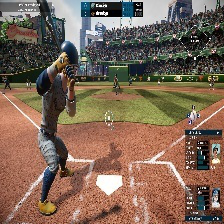

In [37]:
img

In [38]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to bull riding with a 62.48 percent confidence.


**Namun untuk model inference menggunakan dataset baru model mampu memprediksi bahwa gambar tersebut benar merupakan gambar baseball dengan persentase prediksi 62,48% confidence**

### **Model Saving**

In [39]:
model.save("model_base.h5")

## **STEP 7 : PRE-TRAINED MODEL (MobileNetV2)**

In [40]:
keras.backend.clear_session()
np.random.seed(100)
tf.random.set_seed(100)

In [41]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                               include_top=False,
                                               weights='imagenet')

**Freeze semua layer MobileNet V2. Agar tidak berubah weightnya.**

In [42]:
base_model.trainable = False

In [43]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

**Karena layernya dibekukan makan trainable params model ini menjadi nol. Dengan menfreeze layer sebelumnya, selain menghemat banyak waktu untuk training ulang, "hasil belajar" model (dengan datset yang sangat besar)juga tidak ikut hilang jika kita training kembali dengan dataset kita yang tidak seberapa ini.**

### **Create model**

In [44]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [45]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(100)

In [46]:
inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model_MobileNetV2 = tf.keras.Model(inputs, outputs)

In [47]:
base_learning_rate = 0.0001

model_MobileNetV2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
model_MobileNetV2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

### **Train model**

In [49]:
epochs = 20
history = model_MobileNetV2.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/20
2715/2715 [==============================] - 35s 12ms/step - loss: 3.0215 - accuracy: 0.3126 - val_loss: 1.6231 - val_accuracy: 0.6560
Epoch 2/20
2715/2715 [==============================] - 31s 11ms/step - loss: 1.4923 - accuracy: 0.6460 - val_loss: 0.9509 - val_accuracy: 0.7940
Epoch 3/20
2715/2715 [==============================] - 31s 11ms/step - loss: 1.0850 - accuracy: 0.7300 - val_loss: 0.7308 - val_accuracy: 0.8220
Epoch 4/20
2715/2715 [==============================] - 31s 11ms/step - loss: 0.8800 - accuracy: 0.7771 - val_loss: 0.5974 - val_accuracy: 0.8340
Epoch 5/20
2715/2715 [==============================] - 31s 11ms/step - loss: 0.7609 - accuracy: 0.8032 - val_loss: 0.5279 - val_accuracy: 0.8480
Epoch 6/20
2715/2715 [==============================] - 31s 11ms/step - loss: 0.6727 - accuracy: 0.8209 - val_loss: 0.4559 - val_accuracy: 0.8740
Epoch 7/20
2715/2715 [==============================] - 31s 11ms/step - loss: 0.6190 - accuracy: 0.8350 - val_loss: 0.4335 -

### **Visualize training results**

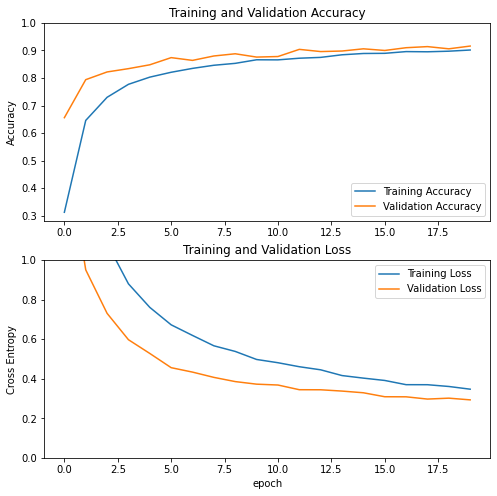

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Dengan pre-trained model MobileNetV2, hasil yang didapatkan jauh lebih baik dari model sebelumnya. Hanya dengan 20 epoch saja, hasil yang didapat sudah sangat baik. Grafik yang dihasilkan pun terlihat bagus antara naiknya akurasi dan turunnya loss dari data training dan data validasi.**

### **Model Evaluation**

In [51]:
model_MobileNetV2.evaluate(test_dataset)

100/100 [==============================] - 2s 16ms/step - loss: 0.2344 - accuracy: 0.9420


[0.23436406254768372, 0.9419999718666077]

**Akurasi yang didapatkan 94,19%.**

### **Model Inference**

In [52]:
test_image = r'/content/drive/MyDrive/Sport/train/axe throwing/002.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

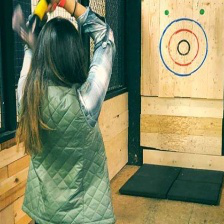

In [53]:
img

In [54]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_MobileNetV2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to axe throwing with a 99.99 percent confidence.


**Kemudian hasil prediksi model inference pada model ini sangat tepat dengan persentase confidence 99,99%**

### **Model Saving**

In [55]:
model_MobileNetV2.save("model_base_MobileNetV2.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


### **Fine tuning**

**Adalah proses dimana kita mencoba untuk melatih (train) model lagi dari hasil latihan sebelumnya dengan layer base_model MobileNetV2 sebagian tidak dibekukan (unfreeze).**

#### **Un-freeze the top layers of the model**

In [56]:
base_model.trainable = True

In [57]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [58]:
# Fine-tune from this layer onwards
fine_tune_at = 120

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

**Di sini, layer yang akan saya training kembali adalah layer ke-121 sampai akhir. Sementara layer sebelumnya akan tetap difreeze.**

In [59]:
model_MobileNetV2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

**Optimizer yang digunakan kali ini berbeda dari sebelumnya, yakni RMSprop yang merupakan turunan dari Optimizer. Menurut web resmi tensorflow, Optimizer baiknya digunakan setelah kita mencoba optimizer lain terlebih dahulu seperti adam, sgd dll. Karena di awal kita sudah memakai optimizer "adam" maka kali ini kita akan mencoba RMSprop.**

In [60]:
model_MobileNetV2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

**Karena ada sebagian layer yang tidak dibekukan, maka trainable params tidak nol seperti sebelumnya.**

#### **Continue training the model**

In [61]:
fine_tune_epochs = 10
epochs = 20
total_epochs =  epochs + fine_tune_epochs

history_fine = model_MobileNetV2.fit(train_dataset, epochs=total_epochs,
                                     initial_epoch=history.epoch[-1],
                                     validation_data=val_dataset)

Epoch 20/30
2715/2715 [==============================] - 49s 17ms/step - loss: 0.3497 - accuracy: 0.8933 - val_loss: 0.3427 - val_accuracy: 0.8940
Epoch 21/30
2715/2715 [==============================] - 45s 16ms/step - loss: 0.3092 - accuracy: 0.9071 - val_loss: 0.2504 - val_accuracy: 0.9200
Epoch 22/30
2715/2715 [==============================] - 44s 16ms/step - loss: 0.2826 - accuracy: 0.9094 - val_loss: 0.2648 - val_accuracy: 0.9040
Epoch 23/30
2715/2715 [==============================] - 44s 16ms/step - loss: 0.2554 - accuracy: 0.9193 - val_loss: 0.2430 - val_accuracy: 0.9040
Epoch 24/30
2715/2715 [==============================] - 45s 16ms/step - loss: 0.2274 - accuracy: 0.9256 - val_loss: 0.2619 - val_accuracy: 0.9180
Epoch 25/30
2715/2715 [==============================] - 45s 16ms/step - loss: 0.2161 - accuracy: 0.9324 - val_loss: 0.2132 - val_accuracy: 0.9280
Epoch 26/30
2715/2715 [==============================] - 44s 16ms/step - loss: 0.2048 - accuracy: 0.9352 - val_loss: 0

#### **Visualize the results**

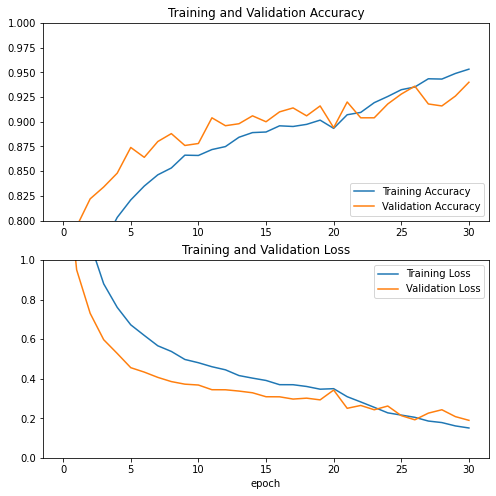

In [62]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Hasil percobaan fine tuning dari model sebelumnya dapat terlihat dari plot. Sebelumnya akurasi yang didapatkan model sudah bagus yakni 95,7%. dan setelah di fine tuning naik menjadi 96,99%.**

In [63]:
loss, accuracy = model_MobileNetV2.evaluate(test_dataset)
print('Test accuracy :', accuracy)

100/100 [==============================] - 2s 16ms/step - loss: 0.1393 - accuracy: 0.9640
Test accuracy : 0.9639999866485596


#### **Model Inference (after fine tuning)**

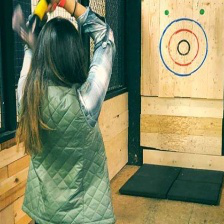

In [64]:
test_image = r'/content/drive/MyDrive/Sport/train/axe throwing/002.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

img

In [65]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_MobileNetV2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to axe throwing with a 100.00 percent confidence.


**Untuk model inferencenya sendiri yang sebelumnya mendapatkan skor prediksi persentase confidence 99,99% ini sudah sangat bagus kemudian setelah dilakukan fine tuning skornya naik jadi 100% ini adalah skor yang sangat sempurna.**

##**STEP 8 : CUSTOM MODEL**

**Creator dataset ini mengatakan "This is a clean dataset. If you build a good model you should achieve at least 95% accuracy on the test set. If you build a very good model for example using transfer learning you should be able to achieve 98%+ on test set accuracy. Untuk itu saya ingin mengimplementasikan secara langsung menggunakan model buatan KC.**

In [66]:
keras.backend.clear_session()
np.random.seed(78)
tf.random.set_seed(78)

In [67]:
base_model = keras.models.load_model("/content/drive/MyDrive/Sport/EfficientNetB3-sports-0.97.h5")

In [68]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
batch_size = 5

**Disini saya menset-up default ukuran gambar 150 x 150, karena pada model yang akan di test menggunakan 150 x 150"**

In [69]:
train_dataset = image_dataset_from_directory(
    train_folder,
    shuffle = True,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 13572 files belonging to 100 classes.


In [70]:
val_dataset = image_dataset_from_directory(
    val_folder,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 500 files belonging to 100 classes.


In [71]:
test_dataset = image_dataset_from_directory(
    test_folder,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 500 files belonging to 100 classes.


In [72]:
base_learning_rate = 0.0001

base_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [73]:
class_names = train_dataset.class_names
print(class_names)

['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing', 'roller 

In [74]:
base_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0]'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.761811 to fit



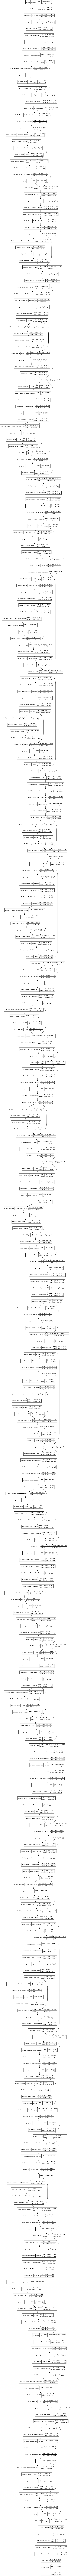

In [75]:
keras.utils.plot_model(base_model,"Custom_Model.png", show_shapes=True)

### **Train model**

In [76]:
epochs = 5
history = base_model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/5
2715/2715 [==============================] - 268s 93ms/step - loss: 0.8737 - accuracy: 0.9113 - val_loss: 0.9130 - val_accuracy: 0.9460
Epoch 2/5
2715/2715 [==============================] - 249s 92ms/step - loss: 0.8588 - accuracy: 0.9243 - val_loss: 1.0913 - val_accuracy: 0.9560
Epoch 3/5
2715/2715 [==============================] - 249s 92ms/step - loss: 0.7748 - accuracy: 0.9423 - val_loss: 1.2006 - val_accuracy: 0.9620
Epoch 4/5
2715/2715 [==============================] - 248s 91ms/step - loss: 0.7683 - accuracy: 0.9429 - val_loss: 1.4567 - val_accuracy: 0.9520
Epoch 5/5
2715/2715 [==============================] - 248s 91ms/step - loss: 0.7287 - accuracy: 0.9506 - val_loss: 1.6068 - val_accuracy: 0.9500


### **Visualize the results**

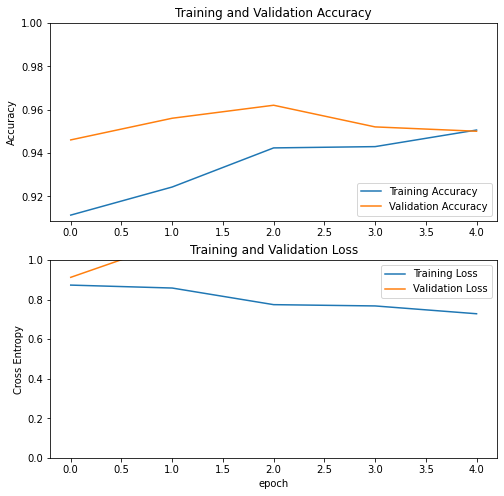

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [78]:
loss, accuracy = base_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

100/100 [==============================] - 3s 28ms/step - loss: 1.4019 - accuracy: 0.9620
Test accuracy : 0.9620000123977661


**Akurasi yang didapat adalah 96,20% dengan 5x epoch benar terbukti jika model yang dibuat oleh creator sudah bagus.**

### **Model Inference**

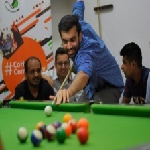

In [79]:
test_image = r'/content/drive/MyDrive/Sport/test/billiards/2.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

img

In [80]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = base_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to billiards with a 100.00 percent confidence.


**Untuk nilai prediksi model inference skornya sempurna yaitu 100% confidence.**

## **STEP 9 : CONCLUSION**

### **EDA Analysis**

* **Dataset yang digunakan memiliki total 100 class yang berisikan 100 jenis cabang olahraga yang berbeda-beda tiap classnya.**
* **Dataset memiliki 3 Folder yang berisikan gambar untuk dilakukan Training, Validation dan Testing.**
* **Semua gambar memiliki format JPG.**
* **Terdapat 13.572 total gambar untuk data training pada folder train_folder.**
* **Terdapat 500 total gambar untuk data validasi pada folder val_folder.**
* **Terdapat 500 total gambar untuk data test pada folder test_folder.**
* **Semua gambar memiliki ukuran 224 x 224 height & width.**

### **Model Analysis**

* **Model akan mendapatkan hasil yang maksimal jika dataset yang dimasukkan adalah dataset yang baik.**

* **Gunakan data_augmentation, batchnormalization, dropout untuk mencegah model untuk overfitting.**

* **Akurasi sebuah model ditentukan dari pemodelan infrastruktur model tersebut, semakin dibuat dengan perhitungan yang baik maka hasil yang didapat juga semakin baik.**

* **Gunakan pre-trained model yang telah terbukti performanya (MobileNetV2, RestNet, VGG, dll). Selain menghemat waktu, hasil yang didapatpun kemungkinan besar lebih baik.**

* **Melakukan step Fine Tuning dapat meningkatkan skor akurasi menjadi lebih baik dari sebelumnya dan untuk model inferencenya bisa mendapatkan skor yang sempurna.**
